## REQUERIMIENTOS ##

Para ejecutar las lineas de codigo que se indican más abajo en este notebook es necesario tener instalados los modulos Keras (Tensorflow), Matplotlib  y Numpy. A continuación se dejan los enlaces con las instrucciones de instalación:

* [Guía instalación Keras (Tensorflow)](https://www.tensorflow.org/install)
* [Guía instalación Matplotlib](https://matplotlib.org/stable/users/installing.html)
* [Guía instalación Numpy](https://numpy.org/install/)

Una vez instalados simplemente se deben cargar los modulos:

In [92]:
# IMPORTAR MODULOS
import keras
from matplotlib import pyplot as plt
import numpy as np

En la carpeta **/Conjuntos test** se encuentran los archivos con **extensión .jpg** que poseen los imagenes de las categorías que los modelos estan diseñados para clasificar. Para este ejemplo se utilizaran imagenes de un tubérculo y una hoja de papa afectadas con tizón tardío.

Las imagenes se pueden cargar desde una carpeta local, es importante tener en consideración que las rutas hacia los archivos dependen de donde se encuentren almacenadas, esto es valido tanto para las imagenes a utilizar como para los modelos que se cargaran más adelante.

In [90]:
# CARGAR IMAGENES Y ASIGNARLAS A UNA VARIABLE
hoja_tizon_tardio = keras.preprocessing.image.load_img("Conjunto test/Hoja_tizon_tardio.jpg", grayscale=False, target_size=(255, 255))
tuberculo_tizon_tardio = keras.preprocessing.image.load_img("Conjunto test/Tuberculo_tizon_tardio.jpg", grayscale=False, target_size=(255, 255))

Para visualizar las imagenes se pueden graficar de la siguiente manera:

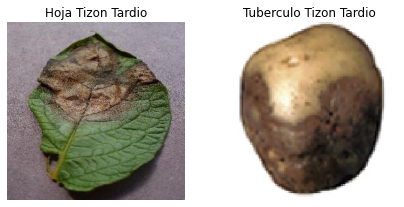

In [93]:
# CREAR SUBGRAFICOS CON LAS IMAGENES CARGADAS
plt.subplots(figsize=(7, 7))
plt.subplot(1,2,1)
plt.imshow(hoja_tizon_tardio)
plt.axis('off')
plt.title("Hoja Tizon Tardio")
plt.subplot(1, 2, 2)
plt.imshow(tuberculo_tizon_tardio)
plt.axis('off')
plt.title("Tuberculo Tizon Tardio")
plt.show()

Para este ejemplo se cargan los modelos implementados a partir de la red VGG16.

In [64]:
# CARGAR MODELOS Y ASIGNARLOS A UNA VARIABLE
modelo_hojas = keras.models.load_model('modelos/VGG16_Hojas.h5')
modelo_tuberculos = keras.models.load_model('modelos/VGG16_Tuberculos.h5')

Previo a evaluar los modelos en las imagenes cargadas, es necesario pre procesar las imagenes para adaptarlas a un formato que coincida con el input con el que fue entrenado originalmente el modelo.

In [77]:
# SE RENOMBRA IMAGEN DE HOJA DE PAPA POR X, PARA NO PERDER EL INPUT ORIGINAL TRAS EL PRE PROCESAMIENTO
x = keras.preprocessing.image.img_to_array(hoja_tizon_tardio)
x = np.expand_dims(x, axis = 0)
x /= 255

# SE RENOMBRA IMAGEN DE TUBERCULO POR Y, PARA NO PERDER EL INPUT ORIGINAL TRAS EL PRE PROCESAMIENTO
y = keras.preprocessing.image.img_to_array(tuberculo_tizon_tardio)
y = np.expand_dims(y, axis = 0)
y /= 224

Para poder interpretar de mejor manera el resultado de los modelos y poder generar mejores visualizaciones, se definen las distinas categorías que pueden clasificar los modelos en distintas variables:

In [94]:
categorias_hojas = ["Sana","Tizón Temprano","Tizón Tardío"]
categorias_tuberculos = ["Sano","Sarna Común","Tizón Tardío"]

Las salidas de los modelos corresponden a probabilidades en porcentajes de que la imagen ingresada pertenezca a cada una de las categorías.

In [78]:
# SE EVALUA IMAGENES EN LOS MODELOS Y SE ASIGNA LOS RESULTADOS A UNA VARIABLE
prediccion_hoja = modelo_hojas.predict(x)
prediccion_tuberculo = modelo_tuberculos.predict(y)

Los resultados se pueden representar de distintas maneras, pero una forma interesante es poder saber cuanta probabilidad de pertencer a cada categoría asigno el modelo a la imagen.

In [110]:
print("La imagen proporcionada posee un:")
for i in range(len(prediccion_hoja[0])):
    print(str(round(prediccion_hoja[0][i]*100,2))+"%","de probabilidad de pertenecer a la categoria",categorias_hojas[i])

La imagen proporcionada posee un:
6.49% de probabilidad de pertenecer a la categoria Sana
0.0% de probabilidad de pertenecer a la categoria Tizón Temprano
93.51% de probabilidad de pertenecer a la categoria Tizón Tardío


In [111]:
print("La imagen proporcionada posee un:")
for i in range(len(prediccion_tuberculo[0])):
    print(str(round(prediccion_tuberculo[0][i]*100,2))+"%","de probabilidad de pertenecer a la categoria",categorias_hojas[i])

La imagen proporcionada posee un:
0.05% de probabilidad de pertenecer a la categoria Sana
0.03% de probabilidad de pertenecer a la categoria Tizón Temprano
99.92% de probabilidad de pertenecer a la categoria Tizón Tardío
